In [1]:
#pip install pomegranate

# import required packages
import pandas as pd
import os
from pomegranate import BayesianNetwork
import warnings
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import datasets
from sklearn import tree

In [2]:
# read all the files and combine them to a single dataframe

print('-------------------------------------------------')
print('Reading all files..')
print('-------------------------------------------------')
path = 'dataset/'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

names = ['counting_trust', 'counting_untrust', 'last_time', 'transaction_context', 'trust_score', 'fair_score', 'extra_space']
df = pd.concat((pd.read_csv(file, sep=" ", names = names, header =None)) for file in files)

df.drop(columns=['extra_space'],inplace=True)
df.to_csv(os.path.join(path,'complete_dataset.csv'))


-------------------------------------------------
Reading all files..
-------------------------------------------------


In [3]:
# check unique values of all the attributes

print('-------------------------------------------------')
print('Different Unique Values of each feature')
print('-------------------------------------------------')
print('counting_trust: ',df.counting_trust.unique())
print('counting_untrust: ',df.counting_untrust.unique())
print('last_time: ',df.last_time.unique())
print('transaction_context: ',df.transaction_context.unique())
print('trust_score: ',df.trust_score.unique())
print('fair_score: ',df.fair_score.unique())
print('-------------------------------------------------')

-------------------------------------------------
Different Unique Values of each feature
-------------------------------------------------
counting_trust:  ['CT_range_4' 'CT_range_1' 'CT_range_2' 'CT_range_3']
counting_untrust:  ['CU_range_1' 'CU_range_4' 'CU_range_3' 'CU_range_5']
last_time:  ['LT_range_4' 'LT_range_1' 'LT_range_3' 'LT_range_2']
transaction_context:  ['sport' 'game' 'ECommerce' 'holiday']
trust_score:  ['untrustworthy' 'trustworthy']
fair_score:  ['fair' 'unfair']
-------------------------------------------------


In [4]:
# encode categorical attributes to form a Bayesian network

print('-------------------------------------------------')
print('Encoding the categorical data')
print('-------------------------------------------------')
df['counting_trust'].replace({'CT_range_1':1,'CT_range_2':2, 'CT_range_3':3, 'CT_range_4': 4},inplace=True)
df['counting_untrust'].replace({'CU_range_1':1,'CU_range_2':2, 'CU_range_3':3, 'CU_range_4': 4, 'CU_range_5': 5},inplace=True)
df['last_time'].replace({'LT_range_1':1,'LT_range_2':2, 'LT_range_3':3, 'LT_range_4': 4},inplace=True)
df['transaction_context'].replace({'sport':1,'game':2, 'ECommerce':3, 'holiday': 4},inplace=True)
df['trust_score'].replace({'untrustworthy':1,'trustworthy':2},inplace=True)
df['fair_score'].replace({'unfair':1,'fair':2},inplace=True)
print('-------------------------------------------------')

-------------------------------------------------
Encoding the categorical data
-------------------------------------------------
-------------------------------------------------


In [5]:
# data analysis
print('-------------------------------------------------')
print('Dataset Analysis')
print('-------------------------------------------------')
#print(df)
print(df.shape)
print(df.head(10))
print(df.describe())
print('-------------------------------------------------')

-------------------------------------------------
Dataset Analysis
-------------------------------------------------
(4830, 6)
   counting_trust  counting_untrust  last_time  transaction_context  \
0               4                 1          4                    1   
1               4                 1          4                    1   
2               1                 4          4                    1   
3               2                 1          4                    1   
4               3                 1          4                    1   
5               4                 1          4                    1   
6               1                 4          4                    1   
7               2                 1          4                    1   
8               3                 1          4                    1   
9               4                 1          4                    1   

   trust_score  fair_score  
0            1           2  
1            1           2  
2   

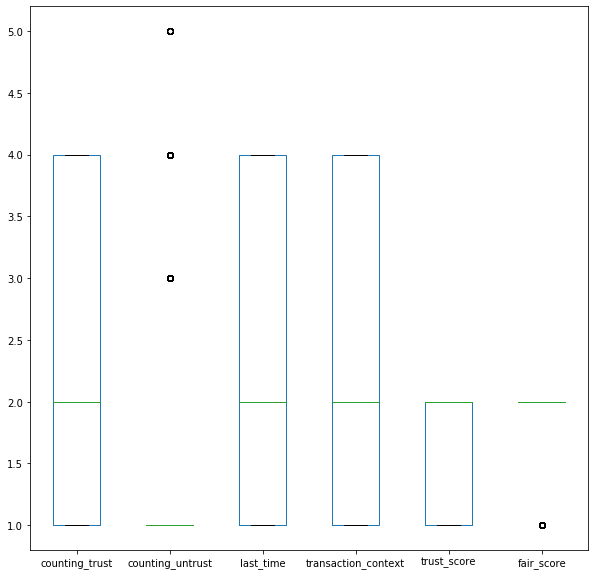

In [6]:
pyplot.rcParams['figure.figsize'] = (10,10)
df.plot(kind='box') 
pyplot.show()

# from the below box plots, counting_untrust and fair_score are having outliers

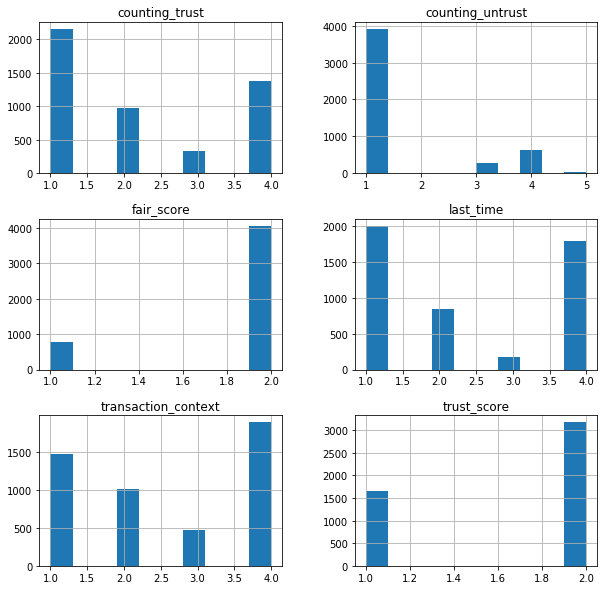

In [7]:
# histograms 
df.hist()
pyplot.show()

# counting_untrust doesn't have values for range 2

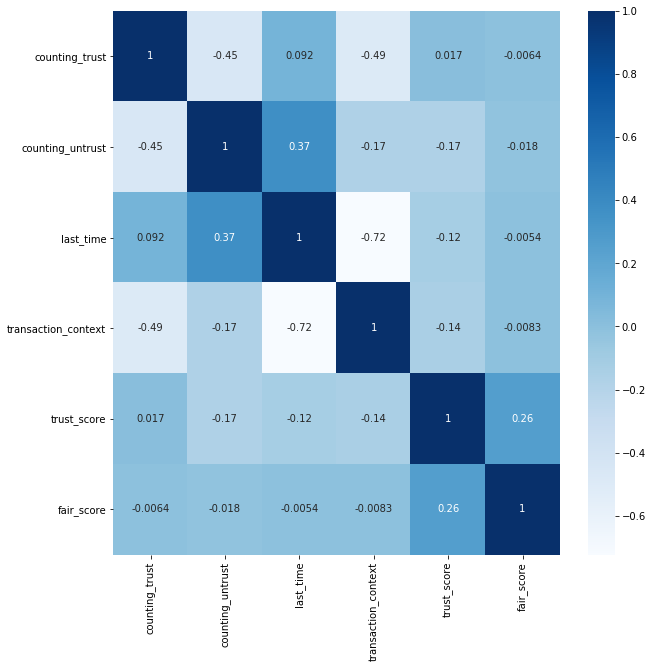

In [8]:
# heat map to see the correlation between various features
sns.heatmap(df.corr(),cmap='Blues', annot = True)

In [9]:
# construct Bayesian Network using pomegranate package
# check probabilities and predictions for different algorithms while constructing Bayesian Network

algorithms = []
algorithms.append('chow-liu')
algorithms.append('greedy')
algorithms.append('exact')
algorithms.append('exact-dp')

for algorithm in algorithms:
    warnings.filterwarnings('ignore')
    model = BayesianNetwork.from_samples(df, algorithm=algorithm)
    print('-------------------------------------------------')
    print('Bayesian Network Algorithm: ' + algorithm.upper())
    print('-------------------------------------------------')
    
    print('\n')
    print('The probability of an internet user having the characteristics')
    print('(Trust Range "4" || Un-trust Range "1" || Last time surfing date Range "4" || Transaction context "sport" ||  "Un-trustworthy" || "Fair") is:')
    print('\n')   
    print(model.probability([[4, 1, 4, 1, 1, 2]]))
    

    print('\n')    
    print('The type of the internet surfer having the characteristics')
    print('(Trust Range "1" || Un-trust Range "1" || Last time surfing date Range "1" || Transaction context "shopping" || "Un-trustworthy") is:')
    print('\n')
    #shopping is considered as 'ECommerce'
    predition = model.predict([[1, 1, 1, 3, 1, None]])
    predicted_type = predition[0][5]
    if(predicted_type == 1):
        type_of_user = 'UNFAIR'
    elif(predicted_type == 2):
        type_of_user = 'FAIR'
    
    print(type_of_user)
    
    print('\n')
    print('The probability of an internet user having the characteristics')
    print('(Trust Range "4" || Un-trust Range "2" || Last time surfing date Range "3" || Transaction context "gaming" ||  "Trustworthy" || "UnFair") is:')
    print('\n')   
    print(model.probability([[4, None, 3, 2, 2, 1]]))
    print('-------------------------------------------------')

-------------------------------------------------
Bayesian Network Algorithm: CHOW-LIU
-------------------------------------------------


The probability of an internet user having the characteristics
(Trust Range "4" || Un-trust Range "1" || Last time surfing date Range "4" || Transaction context "sport" ||  "Un-trustworthy" || "Fair") is:


0.009918185608412044


The type of the internet surfer having the characteristics
(Trust Range "1" || Un-trust Range "1" || Last time surfing date Range "1" || Transaction context "shopping" || "Un-trustworthy") is:


FAIR


The probability of an internet user having the characteristics
(Trust Range "4" || Un-trust Range "2" || Last time surfing date Range "3" || Transaction context "gaming" ||  "Trustworthy" || "UnFair") is:


0.0028797920812660372
-------------------------------------------------
-------------------------------------------------
Bayesian Network Algorithm: GREEDY
-------------------------------------------------


The probabili

In [10]:
# Build decision tree classifier
# Features: 'counting_trust', 'counting_untrust', 'last_time', 'transaction_context', 'trust_score'
# Class: fair_score

X = df[['counting_trust', 'counting_untrust', 'last_time', 'transaction_context', 'trust_score']]
y = df[['fair_score']]
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
# generate a dot file to see the decision tree
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=['counting_trust', 'counting_untrust', 'last_time', 'transaction_context', 'trust_score'])
dotfile.close()

In [12]:
# generate decision tree rules from the model

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [13]:
# generate decision tree rules which can be coded into Prolog

tree_to_code(dt, names)

def tree(counting_trust, counting_untrust, last_time, transaction_context, trust_score, fair_score, extra_space):
  if trust_score <= 1.5:
    if last_time <= 1.5:
      if counting_untrust <= 2.5:
        return [[271.   0.]]
      else:  # if counting_untrust > 2.5
        return [[  0. 127.]]
    else:  # if last_time > 1.5
      if transaction_context <= 2.5:
        if counting_trust <= 3.5:
          return [[154.   0.]]
        else:  # if counting_trust > 3.5
          if transaction_context <= 1.5:
            return [[  0. 269.]]
          else:  # if transaction_context > 1.5
            return [[61.  0.]]
      else:  # if transaction_context > 2.5
        return [[  0. 770.]]
  else:  # if trust_score > 1.5
    if last_time <= 1.5:
      if counting_untrust <= 2.5:
        return [[   0. 1574.]]
      else:  # if counting_untrust > 2.5
        return [[38.  0.]]
    else:  # if last_time > 1.5
      if transaction_context <= 2.5:
        if counting_trust <= 3.5:
         